Условие: https://disk.yandex.ru/i/NYEnvkU_LsiJhg

### Задание 1

#### Пункт 1

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

In [3]:
data = pd.read_csv('brokering.txt', sep='\t')
X = data.iloc[:, 1:-1]
y = data['dv']

In [4]:
# Со стандартизацией

Xst = (X - X.mean()) / X.std()
Xst = np.column_stack((np.ones(X.shape[0]), Xst))

first = Xst.T @ Xst
second = np.linalg.inv(first)
third = Xst.T @ y
beta1 = second @ third
beta1
beta1

array([ 2.19154930e+00,  1.53628600e-01,  9.61900361e-02,  4.26400933e-01,
       -6.78638700e-04, -1.95234122e-02, -3.50723749e-01, -7.47980300e-02])

In [5]:
# Без стандартизации
Xno = np.column_stack((np.ones(X.shape[0]), X))
first = Xno.T @ Xno
second = np.linalg.inv(first)
third = Xno.T @ y
beta2 = second @ third
beta2

array([ 2.27765086e+00,  3.40164150e-01,  3.17874146e-01,  9.82429605e-01,
       -1.41332536e-03, -4.98891956e-02, -2.82390595e-02, -1.82454697e-01])

#### Пункт 2

In [6]:
print(beta1[1]/beta2[1])
print(data['cs_connect'].std())

0.4516307781650261
0.45163077816502484


In [7]:
print(beta1[2]/beta2[2])
print(data['pol_connect'].std())

0.3026041508836919
0.30260415088369413


Вывод: Стандартизация включала в себя деление на стандартное отклонение, соответственно частное от деления получившихся коэффициентов и есть стандартное отклонение.

#### Пункт 3

In [8]:
first = (Xst @ beta1) - y
second = 2 * Xst.T
grad = second @ first
grad

array([ 2.40163445e-12,  2.66453526e-13, -7.67386155e-13, -3.05533376e-13,
        8.52651283e-14, -2.55795385e-13, -4.54747351e-13,  1.59872116e-13])

#### Пункт 4

In [28]:
def grad(X, y, size, steps, vozvr):
    b = np.zeros(X.shape[1])
    nl = []
    for i in range(steps+1):
        y_pred = X @ b
        grad = 2 * (X.T @ (y_pred - y))
        b -= size * grad
        nl.append(b[vozvr])
    return b, nl
b, nl1 = grad(Xst, y, 10e-6, 10000, 1)
b

array([ 2.19154930e+00,  1.53628600e-01,  9.61900361e-02,  4.26400933e-01,
       -6.78638700e-04, -1.95234122e-02, -3.50723749e-01, -7.47980300e-02])

Вывод: при помощи метода градиентного спуска (с достаточным количеством шагов и приемлемой длиной шага) мы смогли получить такие же результаты, как при МНК. 

#### Пункт 5

In [10]:
import matplotlib.pyplot as plt

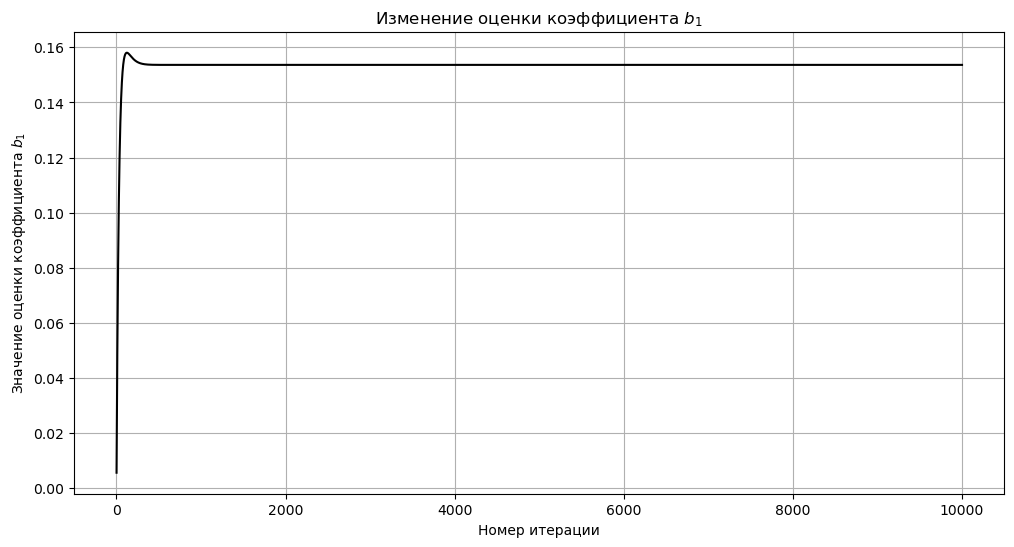

In [29]:
t = list(range(1, len(nl1) + 1))

plt.figure(figsize=(12, 6))
plt.plot(t, nl1, color='black')
plt.title('Изменение оценки коэффициента $b_1$')
plt.xlabel('Номер итерации')
plt.ylabel('Значение оценки коэффициента $b_1$')
plt.grid(True)
plt.show()

In [30]:
b, nl2 = grad(Xst, y, 1e-6, 10000, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


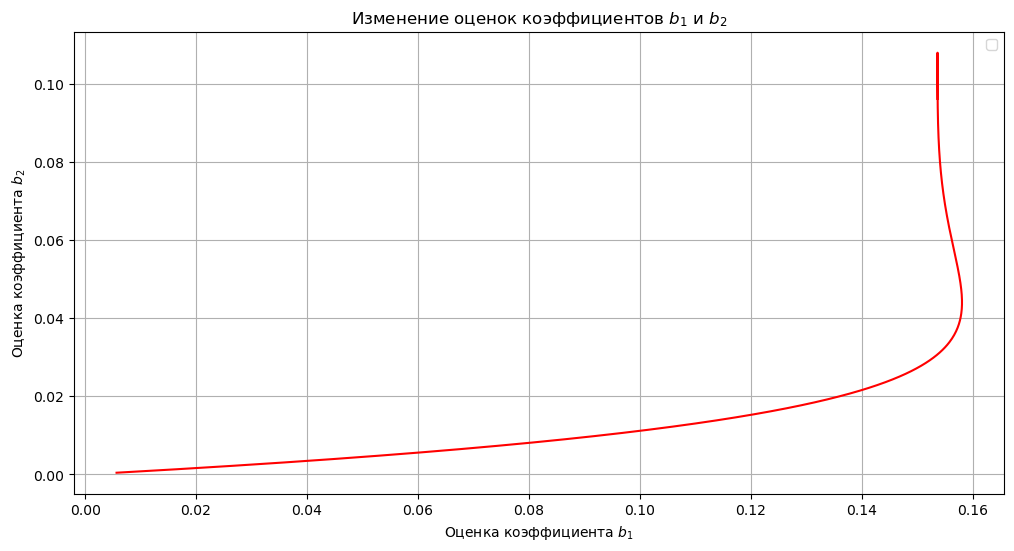

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(nl1, nl2, color='red')
plt.title('Изменение оценок коэффициентов $b_1$ и $b_2$')
plt.xlabel('Оценка коэффициента $b_1$')
plt.ylabel('Оценка коэффициента $b_2$')
plt.legend()
plt.grid(True)
plt.show()

#### Пункт 6

In [32]:
b, nl1 = grad(Xst, y, 0.1, 10000, 1)
b

/var/folders/8z/y74nqvzj4v5c9067fm92c1mr0000gn/T/ipykernel_35800/282944332.py:6: RuntimeWarning: overflow encountered in multiply
  grad = 2 * (X.T @ (y_pred - y))
/var/folders/8z/y74nqvzj4v5c9067fm92c1mr0000gn/T/ipykernel_35800/282944332.py:5: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ b


array([nan, nan, nan, nan, nan, nan, nan, nan])

Пытаясь выполнить спуск, Питон столкнулся с арифметическим переполнением – то есть шаг 0.1 настолько большой, что в какой-то момент результат действия стал больше максимально возможного числа в типе float64 (то есть очень много, больше $1.8*10^{308}$). Вывод: не надо делать такую большу длину шага.

### Задание 2

#### Пункт 1

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xst, y, train_size=0.8, random_state=6)

#### Пункт 2

In [16]:
def ridge(X, y, a):
    coef = []
    I = np.eye(np.shape(X)[1])
    for alpha in a:
        first = (X.T @ X) + alpha * I
        second = np.linalg.inv(first)
        third = X.T @ y
        beta = second @ third
        coef.append(beta)
    return coef

a = np.arange(0.1, 501, 0.1)
coef1 = ridge(X_train, y_train, a)
print(coef1)

[array([ 2.20611919,  0.18342811,  0.11243527,  0.42616325, -0.009359  ,
       -0.02573252, -0.35603832, -0.07977625]), array([ 2.20582024,  0.18342078,  0.11242986,  0.42612275, -0.00935687,
       -0.02571374, -0.3559908 , -0.07975743]), array([ 2.20552137,  0.18341345,  0.11242446,  0.42608225, -0.00935474,
       -0.02569497, -0.3559433 , -0.07973863]), array([ 2.20522259,  0.18340612,  0.11241906,  0.42604177, -0.00935261,
       -0.02567621, -0.3558958 , -0.07971983]), array([ 2.20492388,  0.18339879,  0.11241366,  0.42600128, -0.00935048,
       -0.02565747, -0.35584833, -0.07970104]), array([ 2.20462526,  0.18339146,  0.11240825,  0.42596081, -0.00934835,
       -0.02563873, -0.35580087, -0.07968225]), array([ 2.20432671,  0.18338412,  0.11240285,  0.42592034, -0.00934622,
       -0.02562   , -0.35575342, -0.07966348]), array([ 2.20402825,  0.18337678,  0.11239745,  0.42587988, -0.00934409,
       -0.02560128, -0.35570599, -0.07964472]), array([ 2.20372987,  0.18336945,  0.112

#### Пункт 2

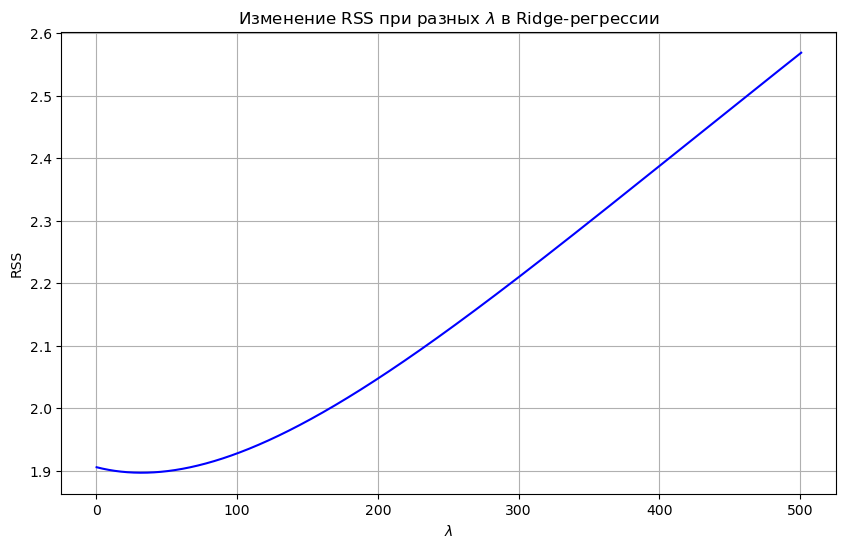

In [17]:
def rss(X, y, coefs):
    values = []
    for coef in coefs:
        y_pred = X @ coef
        rss = np.square(y - y_pred).mean()
        values.append(rss)
    return values

values = rss(X_test, y_test, coef1)

plt.figure(figsize=(10, 6))
plt.plot(a, values, color='blue')
plt.title('Изменение RSS при разных $\lambda$ в Ridge-регрессии')
plt.xlabel('$\lambda$')
plt.ylabel('RSS')
plt.grid(True)
plt.show()

#### Пункт 3

In [18]:
a[np.argmin(values)]

32.0

In [27]:
coef1[np.argmin(values)]

array([ 2.11470426,  0.18101345,  0.11073108,  0.41359969, -0.00869779,
       -0.02019508, -0.34157734, -0.07417824])

#### Пункт 4

Гребневая регрессия немного занижает коэффцициенты переменных, что может говорить о незначительном факте корреляции между переменными (опасаюсь это называть мультиколлинеарностью, но все же она так или иначе в небольшом масштабе есть). Предполагаю, что если бы мы использовали Lasso-регрессию, то какие-то коэффициенты были бы занулены. Давайте попробуем:

In [21]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

Сначала проведем кросс-валидацию по тренировочной выборке, чтобы найти оптимальную лямбду для Lasso

In [25]:
LassoCV(alphas = a, cv = 3).fit(X_train, y_train).alpha_

0.1

Затем проведем обучение с выбранной лямбдой 

In [23]:
lasso = Lasso(0.1).fit(X_train, y_train)
print(lasso.coef_)

[ 0.          0.12770677  0.04646817  0.35794997  0.          0.
 -0.27910362 -0.        ]


Собственно, что и требовалось доказать! Мы видим, что Lasso-регрессия более агрессивно зануляет коэффициенты, которые коррелируют друг с другом. Именно поэтому, кстати, ее  используют для отбора признаков. 